# The Sparks Foundation
# Data Science and Bussiness Analytics Intern
# Name - Aditya Krishnakant Nachan

## Predicting the percentage of students based on the no of study hours

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

In [2]:
link="http://bit.ly/w-data"
data= pd.read_csv(link)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Correlation Analysis

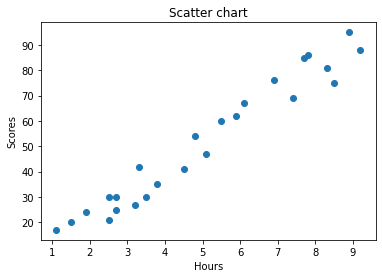

In [6]:
plt.scatter(data["Hours"],data["Scores"])
plt.title('Scatter chart')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


There is a positive correlation between Hours and Scores 

### Defining Dependent and Independent Variables

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
x=data.iloc[:,0:1]
y=data.iloc[:,1]

### Spliting Dataset

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)


### Model Building

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test).round(2)

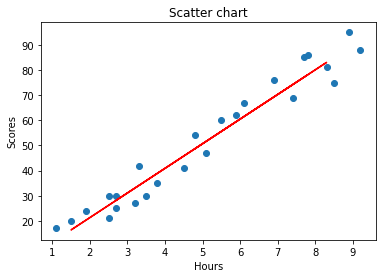

In [11]:
plt.scatter(data["Hours"],data["Scores"])
plt.plot(x_test,y_predict,color='r')
plt.title('Scatter chart')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Mean Absolute Error

In [12]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_predict))

Mean Absolute Error: 4.109999999999998


In [13]:
print(x_test)
y_predict=model.predict(x_test)

    Hours
20    2.7
8     8.3
5     1.5
24    7.8
21    4.8


In [14]:
df=pd.DataFrame({'Actual': y_test,'Predicted': y_predict})

In [15]:
df

,Actual,Predicted
20,30,28.179741
8,81,83.016733
5,20,16.428957
24,86,78.120573
21,54,48.743613


In [16]:
import joblib
joblib.dump(model,"students_marks_predictor.pkl")

['students_marks_predictor.pkl']

In [17]:
a=joblib.load("students_marks_predictor.pkl")
a.predict([[5]])

array([50.7020768])

### Making new predictions 

In [22]:
x= input("Enter no of hours studied: ")
x=float(x)
predict=model.predict([[x]])
print("No of hours = {}".format(x))
print("Predicted score = {}".format(predict[0].round(2)))

Enter no of hours studied: 5
No of hours = 5.0
Predicted score = 50.7
